# Homework
## Mini Batch Training
In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".

Instead of using the entire dataset like
```python
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
```
Use
```python
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
```

You also have to adjust the loop_N accordingly to make sure that it loop over the entire datasets the same number of times.
```python
loop_N = 30*len(data)//batch_size
```

Please plot your learning curve for different batch size, such as 32, 64, 128, 256, 512.

## Answer


In this steps we load the libraries and the necessary data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [2]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')

--2024-10-07 21:26:16--  https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8804 (8.6K) [text/plain]
Saving to: ‘slimmed_realestate_data.csv’

slimmed_realestate_ 100%[===================>]   8.60K  --.-KB/s    in 0s      

2024-10-07 21:26:16 (27.6 MB/s) - ‘slimmed_realestate_data.csv’ saved [8804/8804]



We calculated the parameters using the closed mathematical formula and save the parameters for comparison later

In [3]:
n = len(data)

x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

denominator = n * sum_x2 - sum_x * sum_x

m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator

# saving these for later comparison
m_calc = m
b_calc = b

Now we use the optimization approach. Formulas for ploting graphs, to calculate the loss values and update the parameters are defined.

In [4]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

In [5]:
def model(x,m,b):
   return m * x + b

In [6]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [7]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

In [14]:
df = pd.DataFrame({'N': range(1, 31)})
m_history = []
b_history = []

In [15]:
batch_size = {32, 64, 128, 256, 512}

for k in batch_size:
  # set our initial slope and intercept
  m = 5.
  b = 1000.

  # set a learning rate for each parameter
  learning_rate_m = 1e-7
  learning_rate_b = 1e-1

  # use these to plot our progress over time
  loss_history = []

  loop_N = 30
  baches = len(data)//k


  for i in range(loop_N):

    for j in range(baches):
      data_batch = data.sample(k)
      data_x = data_batch['GrLivArea'].to_numpy()
      data_y = data_batch['SalePrice'].to_numpy()

      # update our slope and intercept based on the current values
      m = updated_m(data_x,data_y,m,b,learning_rate_m)
      b = updated_b(data_x,data_y,m,b,learning_rate_b)

    # calculate the loss value
    loss_value = np.mean(loss(x,y,m,b))

    # keep a history of our loss values
    loss_history.append(loss_value)

    # print our progress
    print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

  df['loss_'+ str(k)] = loss_history
  m_history.append(m)
  b_history.append(b)

[000]  dy_i = 87.06 * x + 37262.89     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1480508283.877877
[001]  dy_i = 89.65 * x + 34675.85     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1486034847.491840
[002]  dy_i = 87.81 * x + 36386.59     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1481047990.239500
[003]  dy_i = 86.48 * x + 37847.22     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1480123676.987558
[004]  dy_i = 91.21 * x + 33873.97     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1497822389.132315
[005]  dy_i = 88.00 * x + 33778.19     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478102471.466494
[006]  dy_i = 87.56 * x + 35165.17     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1477839667.946118
[007]  dy_i = 82.95 * x + 31619.50     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1580203609.595804
[008]  dy_i = 83.36 * x + 35219.20     previously calculated: y_i = 87.6

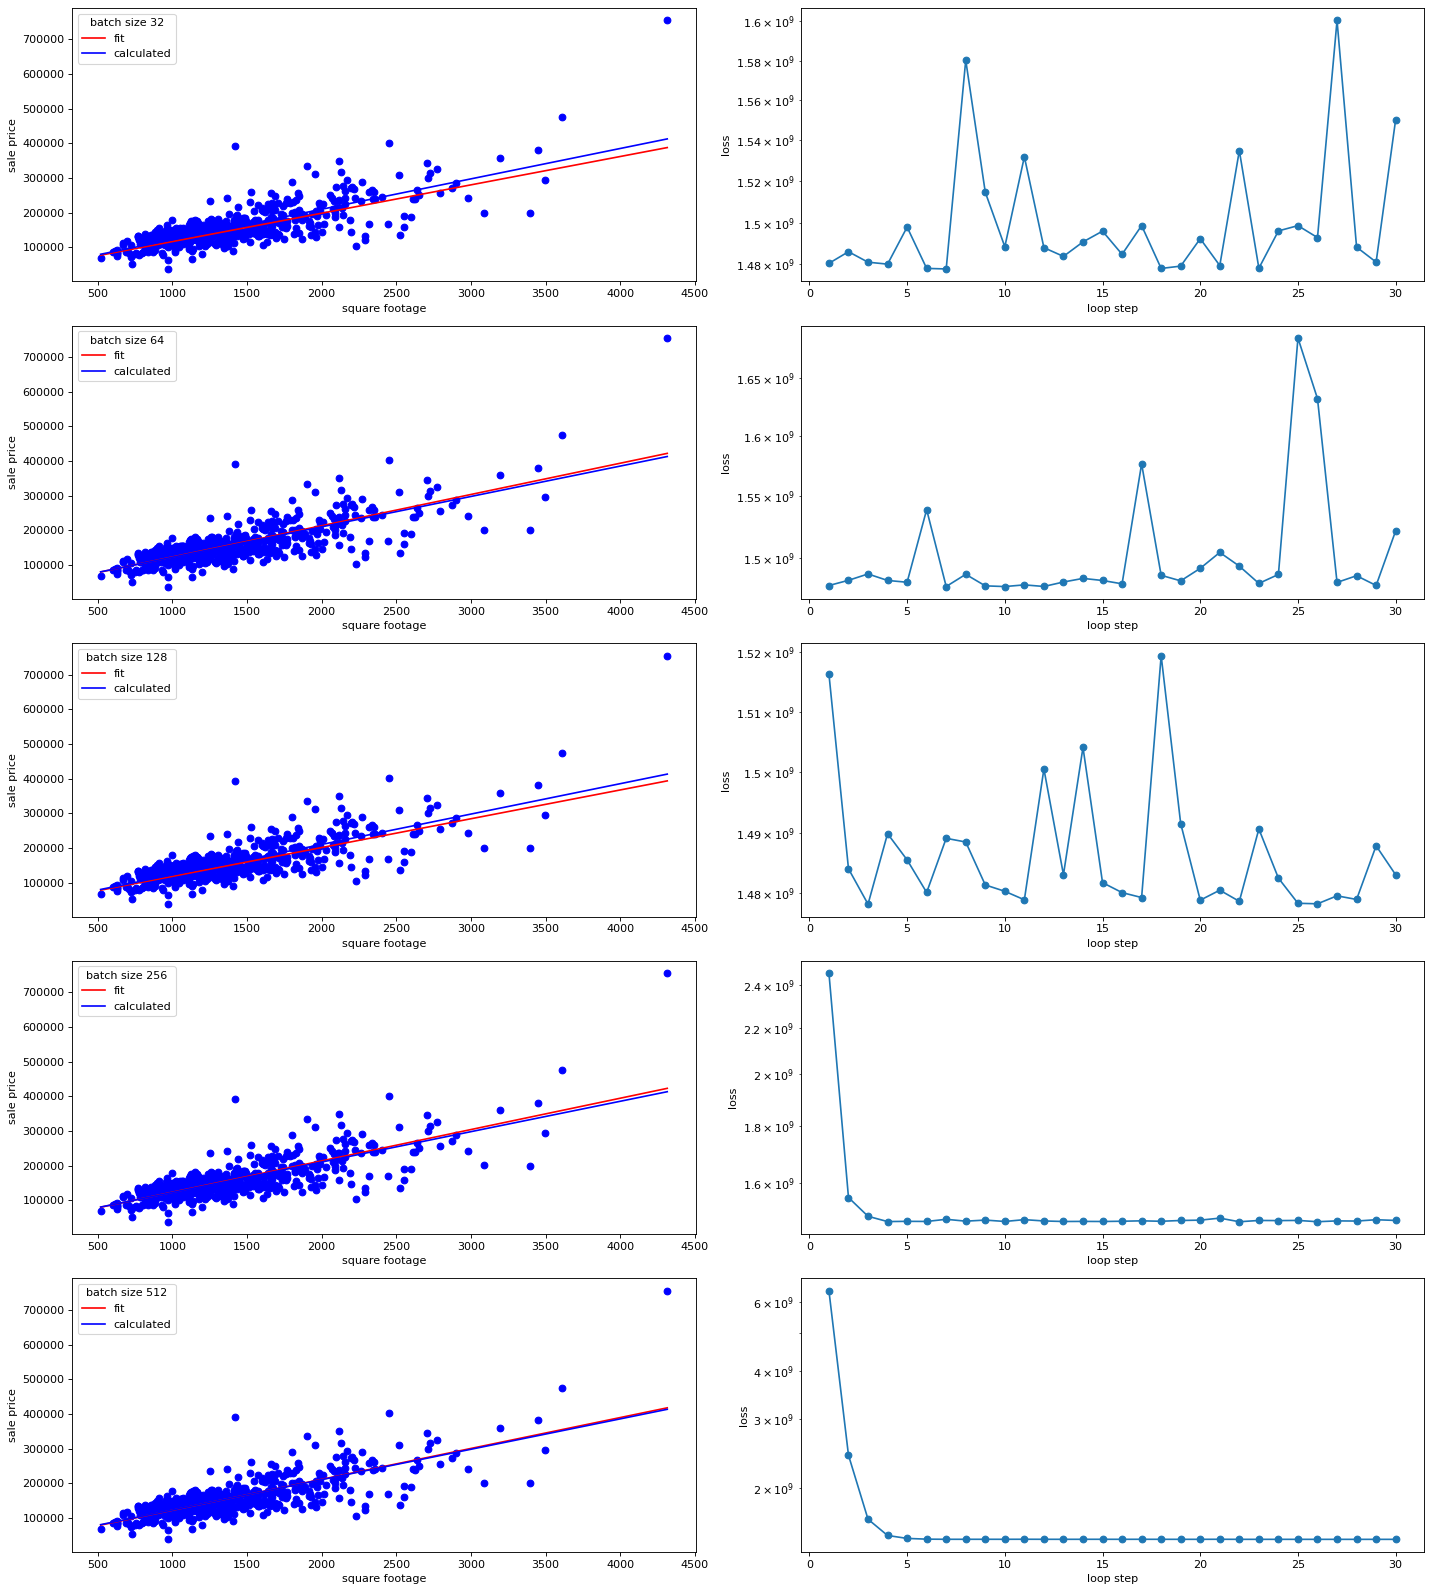

In [19]:
# Create 5 rows and 2 columns of subplots
fig, ax = plt.subplots(5, 2, figsize=(18, 20), dpi=80)

# Batch sizes and corresponding loss columns
batch_sizes = [32, 64, 128, 256, 512]
loss_columns = ['loss_32', 'loss_64', 'loss_128', 'loss_256', 'loss_512']

# Loop through batch sizes to automate plotting
for i, batch_size in enumerate(batch_sizes):
    # Generate line for comparison
    line_x = np.arange(x.min(), x.max())
    line_y = line_x * m_calc + b_calc

    # Plot fit for the current batch size
    plot_data(x, y, m_history[i], b_history[i], ax[i, 0])
    ax[i, 0].plot(line_x, line_y, 'b-', label='calculated')
    ax[i, 0].legend(title=f'batch size {batch_size}')
    ax[i, 0].set_xlabel('square footage')
    ax[i, 0].set_ylabel('sale price')

    # Plot the loss for the current batch size
    ax[i, 1].plot(df['N'], df[loss_columns[i]], 'o-')
    ax[i, 1].set_yscale('log')
    ax[i, 1].set_xlabel('loop step')
    ax[i, 1].set_ylabel('loss')

# Show the final plot
plt.tight_layout()
plt.show()

## Learning rate issue (Bonus)
As described above, if the learning rate is too large, it will affect the convergence. Do your training with (batch_size = 64, learning_rate_m = 1e-7, learning_rate_b = 1e-1). Then linearly increase the batch size and learning rate until you see the training does not converge.
```
(64, 1e-7, 1e-1)*1
(64, 1e-7, 1e-1)*2
(64, 1e-7, 1e-1)*4
(64, 1e-7, 1e-1)*8
...
```
